In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import statistics

In [40]:
fig = plt.figure()

#with open('jk.txt', 'r') as file1:
with open('C:\\Users\\dil-p\\Earring++\\Earring-\\PPG Data\\earlobe\\zach_ear.txt', 'r') as file1:
    groupIR = []
    for line in file1:
        groupIR.append(float(line))
        '''
        if(line.split('=')[0] == 'RED'):
            groupR.append(float(line.split('=')[1]))
        elif(line.split('=')[0] == 'IR'):
            groupIR.append(float(line.split('=')[1]))
        else:
            groupG.append(float(line.split('=')[1]))'''
            
dataIR = np.transpose(groupIR)
y = signal.resample(dataIR,dataIR.size)
totTime = (dataIR.size*20)/1000
x = np.arange(0,totTime,totTime/dataIR.size)
y-=np.mean(dataIR)
y = -y
size = min(y.size,x.size)

<Figure size 640x480 with 0 Axes>

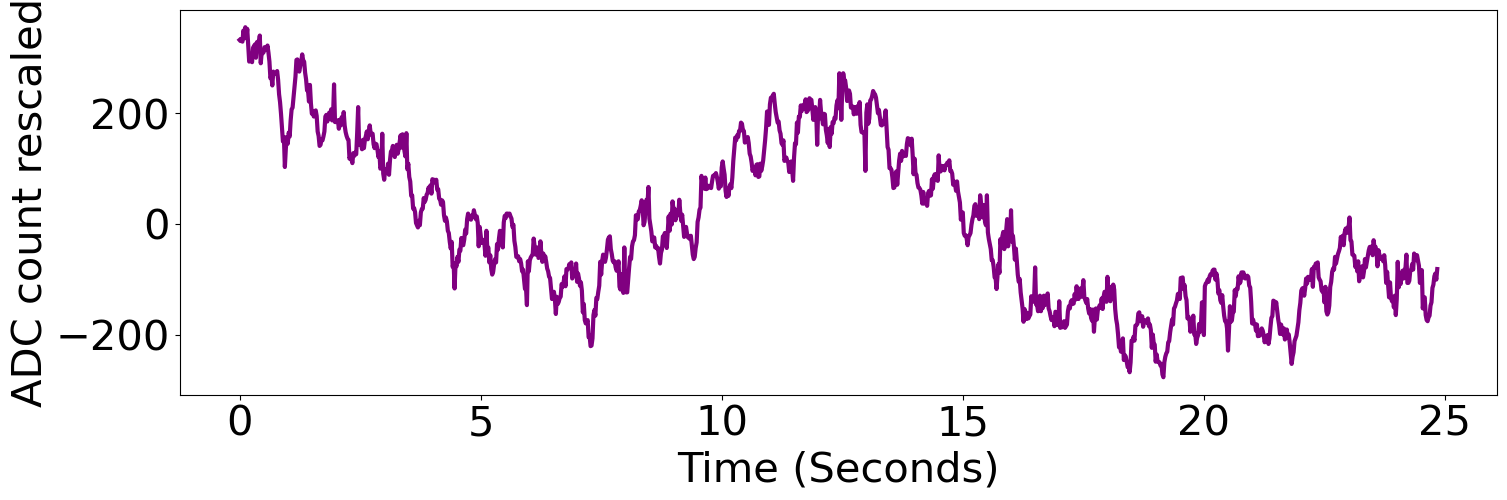

In [41]:
# 50Hz
plt.rcParams.update({'font.size': 30})
f = plt.figure()
f.set_size_inches(17,5) 
plt.ylabel("ADC count rescaled")
plt.xlabel("Time (Seconds)")
plt.plot(x[:size],y[:size],color='purple', linewidth = 3)
#plt.scatter(x, y)

In [38]:
# look into why the signal is drifting
# invert the signal, take the average and subtract from that

# functions for there:
# calc heart rate & heart rate variation
# low pass filter(removes the noise in the smaller peaks) & high pass filter(removes the trend of the signal), threshold & cutoff frequency


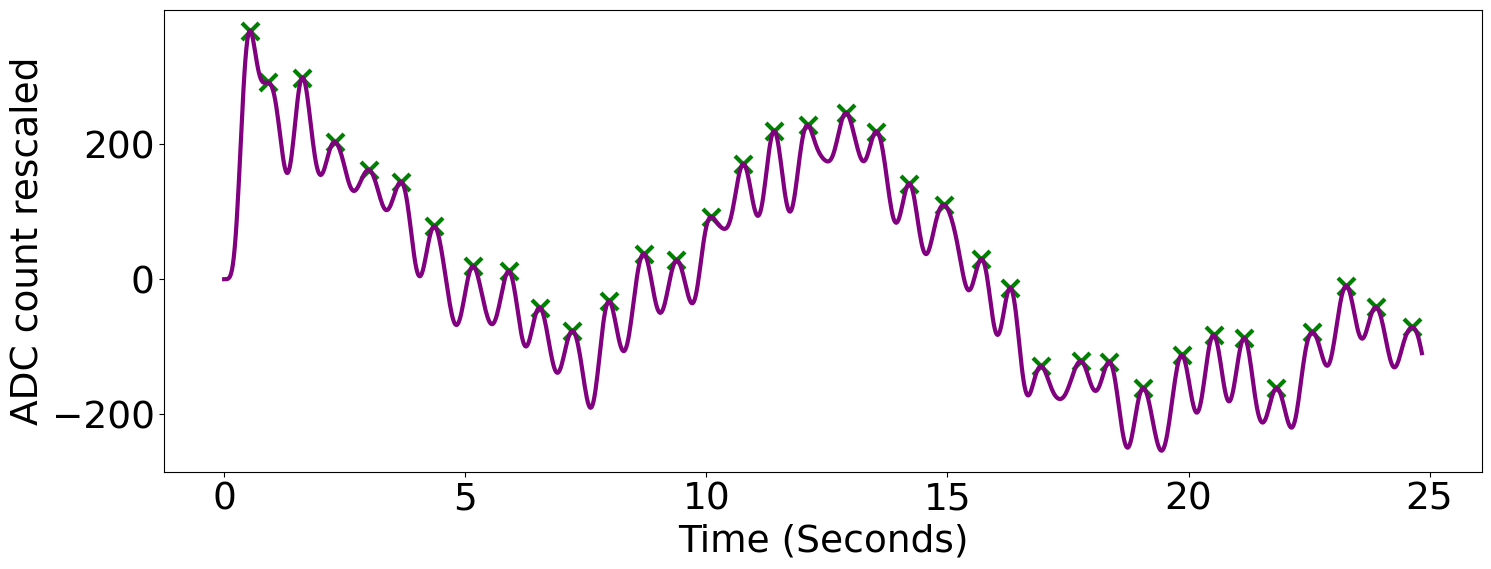

86.88656476267096

In [42]:
def butter_lowpass(cutoff, fs, order=5):
    return signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

# Filter requirements:
order = 6
fs = 50       # sample rate, Hz
cutoff = 2

# Calculate filtered signal & find peaks:
y_new = butter_lowpass_filter(y, cutoff, fs, order)
peaks,properties = signal.find_peaks(y_new[:size], distance = 16.66)
# (50 samp/sec )(60 sec/ 1 min)(1 min / 180 beats)  = 16.6 - max number samples per beat

# Plot the filtered signal
plt.rcParams.update({'font.size': 27})
f_2 = plt.figure()
f_2.set_size_inches(17,6) 

plt.plot(x[:size], y_new[:size], color='purple', linewidth = 3)
plt.ylabel("ADC count rescaled")
plt.xlabel("Time (Seconds)")
plt.scatter(x[peaks], y_new[peaks], marker = "x", color = 'green', linewidth = 3, s = 150)
plt.show()

# Calculates BPM from number of peaks
numPeaks = peaks.size
bpm = (60/totTime) * numPeaks
bpm

In [45]:
#heart rate variability
xvals_peaks = x[peaks]
dist = []
for i in range(0, xvals_peaks.size - 1):
    dist.append((xvals_peaks[i+1] - xvals_peaks[i]))
statistics.stdev(dist)*1000

63.92364104193357